In [1]:
# Importing the libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading the data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

# cleaning data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Example
- Create a scatter plot that plots the count of job postings using job_skills for each skill versus their median salary using salary_year_avg. The count will be on the x-axis while the salary year median will be on the y-axis.

Scatter Plot
- `scatter()` - create a scatter plot of x vs y.
- Common parameters:
    - x, y - Column names or positions to plot, typically one column for the x-axis and another for the y-axis.
    - s - The size of each point. Can be a single size or an array for varying sizes.
    - c - Color of each marker. Can specify a single color or an array to have different colors for each point.
    - marker - The style of the marker. You can use markers like o, ^, *, etc.
    - alpha - The blending value of the markers, between 0 (transparent) and 1 (opaque).
- Syntax: `plt.scatter(df['x'], df['y'], s=df['size'], c=df['color'], alpha=0.5, marker='o')`
- Scatter plots compare different categories or groups of data.

In [6]:
dff= df[df['job_title_short']== 'Data Analyst'].copy()
dff = dff.explode('job_skills')
skill_stats = dff.groupby('job_skills').agg( Median_salary= ('salary_year_avg','median'),job_count=('job_skills','size')) # remember this I can get different aggregation functions from the agg((column name,the aggregation),()) as a tuple
skill_stats

In [16]:
skill_stats.sort_values('job_count',ascending= False, inplace=True)

In [20]:
stats = skill_stats.head(10)
stats

,Median_salary,job_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


plt for scatter

<function matplotlib.pyplot.show(close=None, block=None)>

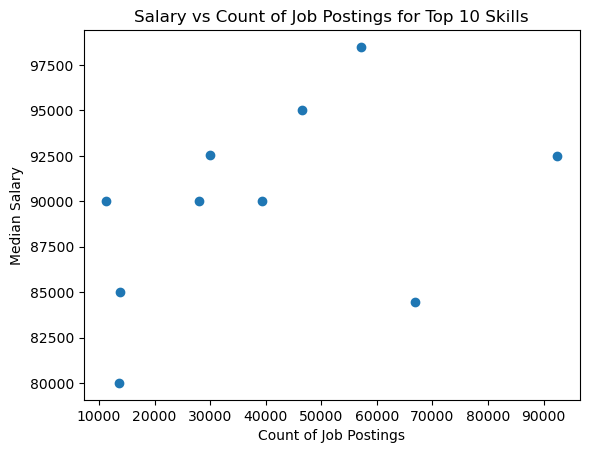

In [24]:
plt.scatter(x=stats['job_count'],y=stats['Median_salary'])
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.show

# seaborn can be used to title the plots immediately

pandas for scatter

<function matplotlib.pyplot.show(close=None, block=None)>

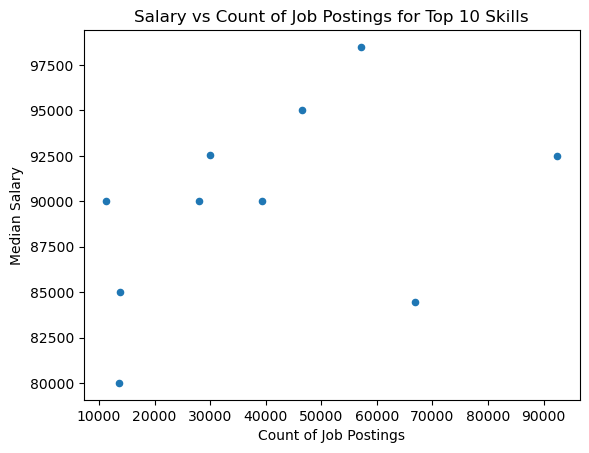

In [23]:
stats.plot(kind='scatter',x='job_count',y= 'Median_salary')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.show

### Add Annotations
- Text
- `.text()`: Add text annotations to the plot.
- Common Arguments:
    - x: The x-coordinate for the text
    - y: The y-coordinate for the text
    - s: The text to display
    - fontsize: The font size of the text
    - color: The color of the text
    - ha: Horizontal alignment of the text
    - va: Vertical alignment of the text

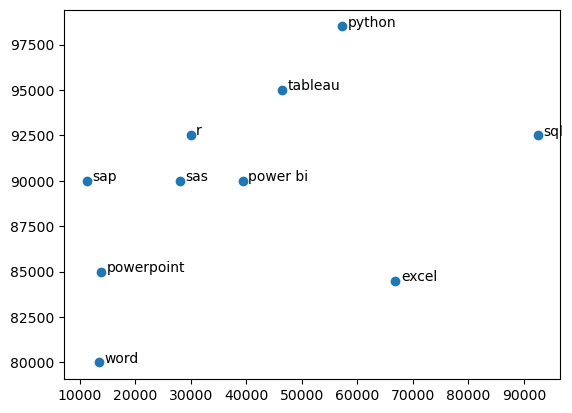

In [35]:
plt.scatter(x=stats['job_count'],y=stats['Median_salary'])

# plt.text() function to label the points
for i ,txt in enumerate(stats.index):
    plt.text(stats['job_count'].iloc[i]+1000, stats['Median_salary'].iloc[i],txt)




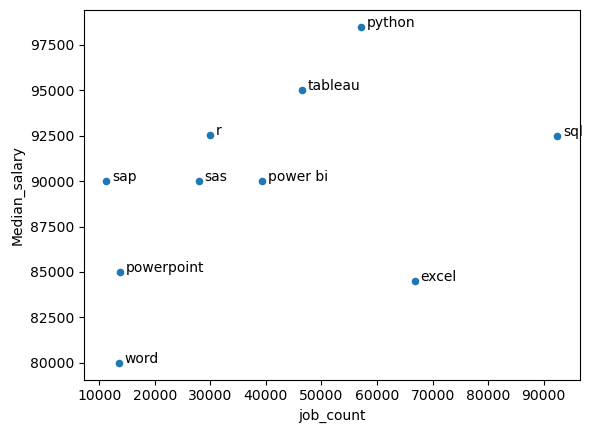

In [36]:
stats.plot(kind='scatter',x='job_count',y= 'Median_salary')

for i ,txt in enumerate(stats.index):
    plt.text(stats['job_count'].iloc[i]+1000, stats['Median_salary'].iloc[i],txt)